In [484]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
dw = load_wine()

In [485]:
scaler = StandardScaler()
sc_x = scaler.fit_transform(dw.data)

In [486]:
x_train, x_test, y_train, y_test = train_test_split(sc_x, dw.target, test_size= 0.3, shuffle= True)

In [487]:
def get_count(B,u):
    n = np.zeros(np.shape(u))
    B = np.array(B)
    #print(np.shape(B))
    for i in range(len(u)):
        for j in range(len(B)):
            if u[i] == B[j]:
                n[i] = n[i]+1
            else:
                pass
    return n

In [488]:
def extraction(A,B,c,u):
    A = np.array(A)
    #print(np.shape(A))
    B = np.array(B)
    w0 = np.zeros((int(c[0]), np.size(A[1])))
    w1 = np.zeros((int(c[1]), np.size(A[1])))
    w2 = np.zeros((int(c[2]), np.size(A[1])))

    state = 0
    for i in u:
        k = 0
        for j in range(len(A)):
            if i == B[j] and state == 0:
                w0[k] = A[j]
                k = k+1

            elif i == B[j] and state ==1:
                w1[k] = A[j]
                k = k+1

            elif i == B[j] and state == 2:
                w2[k] = A[j]
                k = k+1

            else:
                pass

        state = state+1
    return w0, w1, w2

In [489]:
def get_mean(A, B, C, D):
    A = np.array(A)
    B = np.array(B)
    C = np.array(C)
    D = np.array(D)

    m = np.zeros((np.size(A[1]), 1))
    n = np.zeros((np.size(B[1]), 1))
    o = np.zeros((np.size(C[1]), 1))
    p = np.zeros((np.size(D[1]), 1))

    for i in range(np.size(A[1])):
        m[i] = np.mean(A[:,i])
    
    for i in range(np.size(B[1])):
        n[i] = np.mean(B[:,i])
    
    for i in range(np.size(C[1])):
        o[i] = np.mean(C[:,i])
    
    for i in range(np.size(D[1])):
        p[i] = np.mean(D[:,i])

    return m,n,o,p

In [490]:
def normalizer(A,m):
    A = np.array(A)
    #print(np.shape(A))
    for i in range(len(A)):
        for j in range(np.size(A[1])):
            A[i][j] = A[i][j] - m[j]

    return A

In [491]:
def SW(A,B,C,D,E,F):
    a = normalizer(A,D)
    b = normalizer(B,E)
    c = normalizer(C,F)

    sw0 = a.T.dot(a)
    sw1 = b.T.dot(b)
    sw2 = c.T.dot(c)

    X = sw0 + sw1 + sw2
    return X

In [492]:
def SB(A,B,C,E,cnts):
    A = A - E
    B = B - E
    C = C - E

    A = A.dot(A.T)
    B = B.dot(B.T)
    C = C.dot(C.T)

    Y = cnts[0]*A + cnts[1]*B + cnts[2]*C
    return Y

In [493]:
def sep(A,B):

    J = sorted(A, reverse= True)
    j = np.array((J[0], J[1]))
    #print(np.shape(j))
    W = np.zeros((2, np.size(A)))
    #print(type(j))
    e = 0
    #count = np.zeros((1,2))
    #print(count[0][0])
    for i in j:  
        for k in range(len(A)):
            if i == A[k]:
                W[e] = B[k]
                e=e+1  
    #print('W: \n')        
    #pd.DataFrame(W)
    return W

In [494]:
def Add(C,D,E,M):
    for j in range(len(M[0,:])):
        M[0][j] = C[j]

    for j in range(len(C)):
        M[1][j] = D[j]

    for j in range(len(C)):
        M[2][j] = E[j]

    return M

In [495]:
def classi(A,B,C,D,E,u):
    
    M = np.zeros((np.size(u), np.size(C)))
    r = np.zeros(np.shape(u))
    ypred = np.zeros(np.shape(B))
    M = Add(C,D,E,M)
    for i in range(len(A)):
        count = 0
        for j in range(len(u)):
            r[j] = sum(abs(A[i] - M[j]))
        c = min(r)  
        for a1 in r:
            if a1 == c:
                ypred[i] = count
            else:
                count = count+1
    
    return ypred

In [496]:
def important_parameters(E):
    #print(E.real)
    J = sorted(E, reverse= True)
    j = np.array((J[0], J[1]))
    #print(j)
    cnt = np.zeros((1,2))
    for i in range(len(j)):
        count = 0
        for k in range(len(E)):
            if j[i] == E[k].real:
                cnt[0][i] = count 
            else:
                count = count+1
    
    #print(cnt)

    print("\n the important parameters are: \n")
    print(dw.feature_names[int(cnt[0][0])])
    print(dw.feature_names[int(cnt[0][1])])
    print('\n')
    return cnt

In [497]:
l = ['a','b','c']
c = np.asarray(l)
print(type(l))

<type 'list'>


In [498]:
# from turtle import color
# from pyparsing import col
# 

def color_code(A, B, C, u, y):
    colors = []
    for i in B:
        state = 0
        for j in range(len(u)):
            if i == u[j] and state == 0:
                colors.append('r')
                
            elif i == u[j] and state == 1:
                colors.append('b')
                
            elif i == u[j] and state == 2:
                colors.append('g')
            else:
                state = state+1
                   
    lda = A.dot(C.T)
    for i in range(len(A)):
        plt.scatter(x= lda[i:,0], y= lda[i:,1], color= colors[i])

In [499]:
def marks(A,B):
    count = 0.0
    # print(type(count))
    for i in range(len(A)):
        if A[i] == B[i]:
            count = count+1
        else:
            pass
    
    m = (count/float(len(A)))*100
    return m

In [500]:
def LinDisAnal(A,B):
    #print(np.shape(A))
    U = np.unique(B)
    counts = get_count(B,U)
    W0, W1, W2 = extraction(A, B, counts, U)
    M0, M1, M2, M = get_mean(W0, W1, W2, A)
    sw = SW(W0,W1,W2,M0,M1,M2)
    sb = SB(M0,M1,M2,M,counts)
    Yp = classi(A,B, M0, M1, M2, U)
    print('accuracy score using python libraries: \n')
    print(metrics.accuracy_score(Yp, B)*100)
    print('\n')
    print('accuracy score using my code: \n')
    Mark = marks(Yp, B)
    print(Mark)
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(sw).dot(sb))
    #print(np.shape(eig_vals))
    ip = important_parameters(eig_vals)
    #print(ip)
    nm= sep(eig_vals, eig_vecs)
    color_code(x_train, y_train, nm, U, Yp)
    cm = confusion_matrix(B, Yp)
    print(cm)


accuracy score using python libraries: 

96.7741935483871


accuracy score using my code: 

96.7741935484

 the important parameters are: 

ash
malic_acid




/home/raghu/.local/lib/python2.7/site-packages/ipykernel_launcher.py:14: ComplexWarning:

Casting complex values to real discards the imaginary part



[[42  0  0]
 [ 2 43  2]
 [ 0  0 35]]


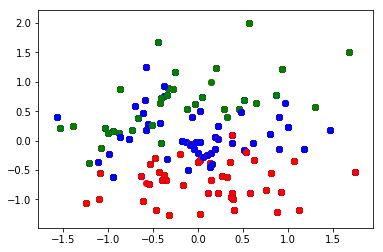

In [501]:
LinDisAnal(x_train, y_train)
#LinDisAnal(x_test, y_test)

In [502]:
print(dw.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [503]:
from sklearn.ensemble import RandomForestClassifier
classify = RandomForestClassifier()
classify.fit(x_train, y_train)
y_pred = classify.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred)*100) 

98.14814814814815


SKlearn LDA

In [504]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [505]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [506]:
lda = LDA(n_components= 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [507]:
# make predictions 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth= 2, random_state= 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [508]:
# evaluating the performance 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(str(accuracy_score(y_test, y_pred)))

[[17  0  0]
 [ 0 24  0]
 [ 0  0 13]]
1.0
